# Exercise 1: Data cleaning

Before doing actual data analysis, we usually first need to clean the data. 
This might involve steps such as dealing with missing values and encoding categorical variables as integers.

Load the Titanic data set in `titanic.csv` and perform the following tasks:

1. Report the number of observations with missing `Age`, for example using [`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html).

2. Compute the average age in the data set. Use the following approaches and compare your results:
    1.  Use the [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) method.
    2.  Convert the `Age` column to a NumPy array using [`to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html). Experiment with NumPy's [`np.mean()`](https://numpy.org/doc/2.0/reference/generated/numpy.mean.html) and [`np.nanmean()`](https://numpy.org/doc/2.0/reference/generated/numpy.nanmean.html) to see if you obtain the same results.

3. Replace the all missing ages with the mean age you computed above, rounded to the nearest integer. Convert this updated `Age` column to integer type using [`astype()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html).

   Note that in "real" applications, replacing missing values with sample means is usually not a good idea. 

4. Generate a new column `Female` which takes on the value one if `Sex` is equal to `"female"` and zero otherwise. 
   This is called an _indicator_ or _dummy_ variable, and is preferrable to storing such categorical data as strings.
   Delete the original column `Sex`.

5. Save your cleaned data set as `titanic-clean.csv` using [`to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) with `,` as the field separator.
   Tell `to_csv()` to *not* write the `DataFrame` index to the CSV file as it's not needed in this example.

## Solution

### Loading the data

In [1]:
# Path to data directory
DATA_PATH = '../../data'

# Alternatively, load data directly from GitHub
# DATA_PATH = 'https://raw.githubusercontent.com/richardfoltyn/FIE463-V25/main/data'

In [2]:
import pandas as pd

# Path to Titanic CSV file
fn = f'{DATA_PATH}/titanic.csv'

df = pd.read_csv(fn)

### Part 1: Number of missing values

The number of non-missing values can be displayed using the `info()` method. Alternatively, we can count the number of missing values directly by summing the return values of `isna()`.

In [3]:
# Display missing counts for each column
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [4]:
# Alternative way to get the number of missing values: 
df['Age'].isna().sum()

np.int64(177)

### Part 2: Compute mean age

We compute the mean age using the three different methods. As you can see, `np.mean()` cannot deal with missing values and returns `NaN` (_"not a number"_).

In [5]:
import numpy as np

# Compute mean age using the DataFrame.mean() method
mean_age = df['Age'].mean()

# Convert Age column to NumPy array
age_array = df['Age'].to_numpy()

# Compute mean using np.mean()
mean_age_np = np.mean(age_array)

# Compute mean using np.nanmean()
mean_age_np_nan = np.nanmean(age_array)

print(f'Mean age using pandas:       {mean_age:.3f}')
print(f'Mean age using np.mean():    {mean_age_np:.3f}')
print(f'Mean age using np.nanmean(): {mean_age_np_nan:.3f}')

Mean age using pandas:       29.699
Mean age using np.mean():    nan
Mean age using np.nanmean(): 29.699


### Part 3: Replace missing values

There are several ways to replace missing values. First, we can "manually"
identify these using boolean indexing and assign a new value to such observations. 

In [6]:
# Round average age
mean_age = np.round(mean_age)

# boolean arrays to select missing observations
is_missing = df['Age'].isna()

# Update missing observations with rounded mean age
df.loc[is_missing, 'Age'] = mean_age

There is also the convenience routine [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
which automates this step. 
To illustrate, we need to reload the original data as we have just replaced all missing values.

In [7]:
# Re-load data to get the original missing values
df = pd.read_csv(fn)

df['Age'] = df['Age'].fillna(value=mean_age)

Since age is usually recorded as an integer, there is no reason to store it as a `float` once we have dealt with the missing values.

In [8]:
df['Age'] = df['Age'].astype(int)

### Part 4: Generate Female indicator

An indicator variable can be obtained as a result of a logical operation (`==`, `!=`, etc.). This value contains `True` or `False` values, which we can convert to 1 or 0 by changing the data type to integer.

In [9]:
# Generate boolean array (True/False) whether passenger is female
is_female = (df['Sex'] == 'female')

# Add Female dummy variable, converted to integer
df['Female'] = is_female.astype(int)

# Delete original Sex column, no longer needed
del df['Sex']

# Alternatively, you can use
# df = df.drop(columns=['Sex'])

### Part 5: Save cleaned file

We can use `info()` again to confirm that `Age` has no missing values and all columns are of the desired data type:

In [10]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    int64  
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Female       891 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 69.7+ KB


In [11]:
# Save cleaned file
fn_clean = 'titanic-cleaned.csv'

df.to_csv(fn_clean, sep=',', index=False)

***
# Exercise 2: Daily returns of US stock market indices

In this exercise, we examine how the three major US stock market indices performed last year using data from Yahoo! Finance.

1. Use the [`yfinance`](https://pypi.org/project/yfinance/) library and its `download()` 
    function to obtain the time series of daily observations for the 
    [S&P 500](https://en.wikipedia.org/wiki/S%26P_500), the 
    [Dow Jones Industrial Average (DJIA)](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average) 
    and the 
    [NASDAQ Composite](https://en.wikipedia.org/wiki/Nasdaq_Composite) 
    indices. 
    Restrict the sample to the period from 2024-01-01 to 2024-12-31
    and keep only the closing price stored in column `Close`.

    _Hint_: The corresponding ticker symbols are `^GSPC`, `^DJI`, `^IXIC`, respectively.

2. Rename the DataFrame columns to `'SP500'`, `'Dow Jones'` and `'NASDAQ'` using the 
    [`rename()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) 
    method.

    *Hint:* `rename(columns=dict)` expects a dictionary as an argument which maps existing to new column names.

3.  Plot the three time series (one for each index) in a single graph. Label all axes and make sure your graph contains a legend.

    _Hint:_ You can directly use the [`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) 
    method implemented in `pandas`.

4.  The graph you created in the previous sub-question is not well-suited to illustrate how each index developed in 2024 
    since the indices are reported on vastly different scales (the S&P500 appears to be an almost flat line).

    To get a better idea about how each index fared in 2024 relative to its value at the beginning of the year, normalize each index by its value on the first trading day in 2024 (which was 2024-01-02). Plot the resulting normalized indices.

5.  For each index, compute the daily returns, i.e., the relative change vs. the previous closing price in percent.
    Create a plot of the daily returns for all indices.

    *Hint:* Use [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) to compute the change 
    relative to the previous observation.

## Solution

### Part 1: Download data

In [12]:
import yfinance as yf

# List of ticker symbols
tickers = ['^GSPC', '^DJI', '^IXIC']

# Period
start = '2024-01-01'
end = '2024-12-31'

data = yf.download(tickers, start=start, end=end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


As you can see, the resulting DataFrame has a hierarchical column index, with the first level being the variable names (`Adj Close`, `Close`, etc.) and the second level comprising the ticker symbols.

In [13]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-02 to 2024-12-30
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^DJI)    251 non-null    float64
 1   (Close, ^GSPC)   251 non-null    float64
 2   (Close, ^IXIC)   251 non-null    float64
 3   (High, ^DJI)     251 non-null    float64
 4   (High, ^GSPC)    251 non-null    float64
 5   (High, ^IXIC)    251 non-null    float64
 6   (Low, ^DJI)      251 non-null    float64
 7   (Low, ^GSPC)     251 non-null    float64
 8   (Low, ^IXIC)     251 non-null    float64
 9   (Open, ^DJI)     251 non-null    float64
 10  (Open, ^GSPC)    251 non-null    float64
 11  (Open, ^IXIC)    251 non-null    float64
 12  (Volume, ^DJI)   251 non-null    int64  
 13  (Volume, ^GSPC)  251 non-null    int64  
 14  (Volume, ^IXIC)  251 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 31.4 KB


The columns in the hierarchical `MultiIndex` are difficult to work with, so we only keep the `Close` column and discard the remaining data:

In [14]:
# Keep only Close column
data = data['Close']

### Part 2: Rename columns

We get rid of the inconvenient column names and replace them with something more readable:

In [15]:
# Rename to get nicer column names
names = {
    '^GSPC': 'SP500', 
    '^DJI': 'Dow Jones', 
    '^IXIC': 'NASDAQ'
}
    
data = data.rename(columns=names)

We can get a peak at the first few rows using the `head()` method.

In [16]:
data.head(3)

Ticker,Dow Jones,SP500,NASDAQ
Date,,,
2024-01-02,37715.039062,4742.830078,14765.940430
2024-01-03,37430.191406,4704.810059,14592.209961
2024-01-04,37440.339844,4688.680176,14510.299805


### Part 3: Plot indices

We can create the plot directly with pandas's plotting functions:

<Axes: title={'center': 'US Stock market indices in 2024'}, xlabel='Date', ylabel='Value at close'>

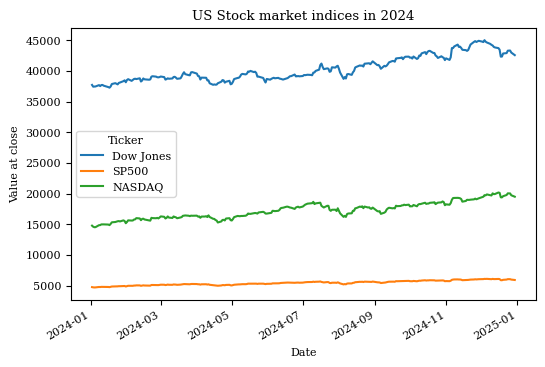

In [17]:
# Plot all three indices, setting a label for the y-axis.
data.plot(
    ylabel='Value at close', title='US Stock market indices in 2024', figsize=(6, 4)
)

Alternatively, we can create the plot ourselves using with traditional Matplotlib functions:

Text(0.5, 1.0, 'US Stock market indices in 2024')

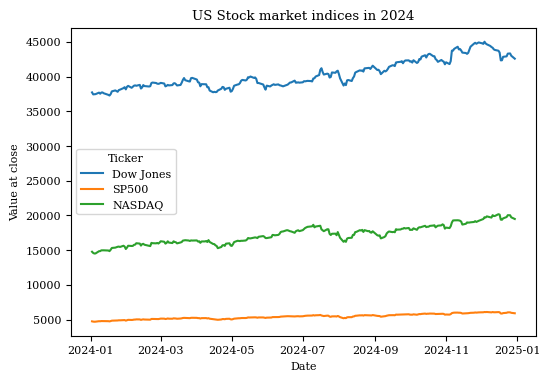

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(data)
plt.legend(data.columns, title='Ticker')
plt.xlabel('Date')
plt.ylabel('Value at close')
plt.title('US Stock market indices in 2024')

### Part 4: Normalized indices

To normalize each column by its first value divide the `DataFrame` by its first row which can be selected using `.iloc[]`:

In [19]:
close_norm = data / data.iloc[0]

You can use `head()` to verify that the first normalised element of each column is now 1.

In [20]:
close_norm.head(3)

Ticker,Dow Jones,SP500,NASDAQ
Date,,,
2024-01-02,1.000000,1.000000,1.000000
2024-01-03,0.992447,0.991984,0.988234
2024-01-04,0.992716,0.988583,0.982687


Finally, we plot the normalised indices just like in the previous sub-question. It is now much easier to see that these indices moved very similarly over this year.

<Axes: title={'center': 'US Stock market indices in 2024'}, xlabel='Date', ylabel='Normalized value'>

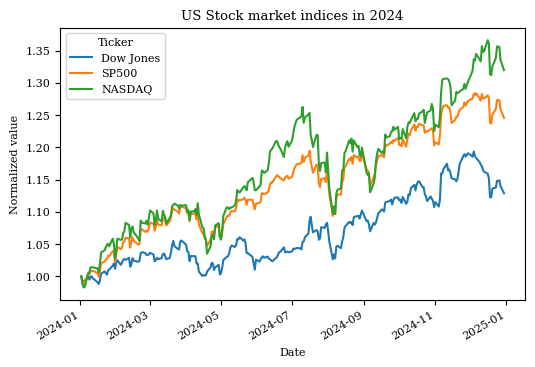

In [21]:
# Create a plot using pandas's plotting functions
close_norm.plot(
    ylabel='Normalized value', title='US Stock market indices in 2024', figsize=(6, 4)
)

Alternatively, we can again create the plot using Matplotlib functions:

Text(0.5, 1.0, 'US Stock market indices in 2024')

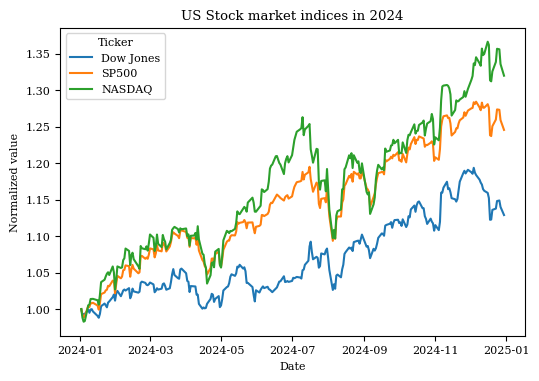

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(close_norm)
plt.legend(close_norm.columns, title='Ticker')
plt.xlabel('Date')
plt.ylabel('Normalized value')
plt.title('US Stock market indices in 2024')

### Part 5: Daily returns

We use the [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) method to compute the relative difference between two consecutive closing prices.

In [23]:
# Relative difference from previous closing price in percent
returns = data.pct_change() * 100.0

Because we cannot compute a difference for the very first observation, this value is set to `NaN`.

In [24]:
returns.head(3)

Ticker,Dow Jones,SP500,NASDAQ
Date,,,
2024-01-02,NaN,NaN,NaN
2024-01-03,-0.755263,-0.801631,-1.176562
2024-01-04,0.027113,-0.342838,-0.561328


<Axes: title={'center': 'US Stock market indices in 2024'}, xlabel='Date', ylabel='Daily return in %'>

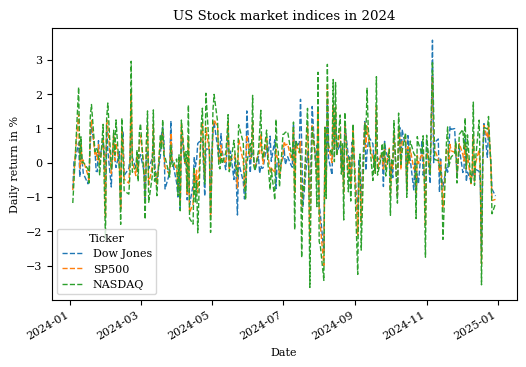

In [25]:
# use dashed lines since daily returns are overlapping
returns.plot(
    ylabel='Daily return in %',
    lw=1.0,
    ls='--',
    figsize=(6, 4),
    title='US Stock market indices in 2024',
)

The corresponding Matplotlib code to create this graph is as follows:

Text(0.5, 1.0, 'US Stock market indices in 2024')

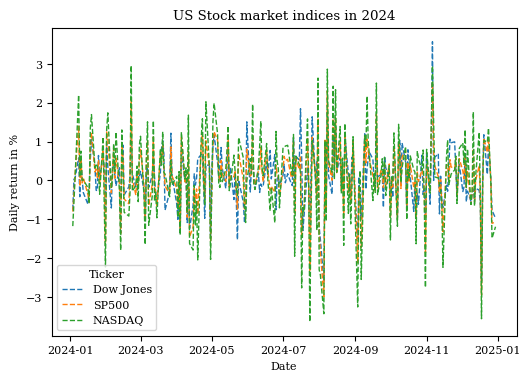

In [26]:
plt.figure(figsize=(6, 4))
plt.plot(returns, ls='--', lw=1)
plt.legend(returns.columns, title='Ticker')
plt.xlabel('Date')
plt.ylabel('Daily return in %')
plt.title('US Stock market indices in 2024')